## Learning Curves
Extracted from Andrew Ng lectures.

Learning curves help determine if increasing the sample size is effective to decrease the error. It also helps in tuning the hyperparameters of the algorithm. 
The data is divided in 3 sets:
i) training set (60\% of the size);
ii) Cross validation $cv$ set (20\% of total samples);
iii) test set (20\% of total samples).

The approach is training $\Theta$ using the training set. Then, compute the error with $\Theta$ in the different sets using the equations below:

$$J_{train}(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2 $$

$$J_{cross validation} = \frac{1}{2m_{cv}} \sum_{i=1}^{m_{cv}}(h_\theta(x_{cv}^{(i)})-y_{cv}^{(i)})^2  $$

$$J_{test} = \frac{1}{2m_{test}} \sum_{i=1}^{m_{test}}(h_\theta(x_{test}^{(i)})-y_{test}^{(i)})^2$$

Finally, we plot the error of training set and cross validation vs number of samples. The test set is left for comparing different methods. Examples of linear regression, polynomial regression and regularized polinomial regression are demonstrated below.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import scipy.io as sio

In [16]:
def XPolynomial(X,deg):
    XPoly = np.copy(X)
    for i in range(2,deg+1):
        a = X**i
        XPoly = np.hstack((XPoly,a))
    XPoly = Normalize(XPoly)
    XPoly = np.insert(XPoly, 0, 1, axis=1)
    return XPoly

def Error(th,Y,X):
    # Error Between prediction and data
    m = Y.size
    Y = Y.flatten()
    h = X @ th
    J = (1/(2*m))*np.sum((h-Y)**2)
    return J

def Normalize(arr):
#     print('Arrayb4:',arr)
    arr = arr - arr.mean(axis=0)
    arr = arr / np.std(arr,axis=0)
#     print('Array after:',arr)
    return arr

def RegLinRegrCost(th,Y,X,lambd):
    # Cost Function for Linear Regression
    m = Y.size
    Y = Y.flatten()
    h = X @ th
    J = (1/(2.0*m))*np.sum((h-Y)**2.0)+(lambd/(2.0*m))*th[1:].T@th[1:]
    return J

def LinRegrGradient(th,Y,X,lambd):
    # Gradient for regularized Logistic Regression
    m = Y.size
    Y = Y.flatten()
    h = X @ th
    lambdVec = lambd*np.ones(X.shape[1])
    lambdVec[0] = 0
    G = (1/m)*(X.T@(h-Y))+(lambd/m)*theta
    return G.flatten()
   
def Train(th,y,X,lambd):
    # Calculate theta* using optimization.
    res = minimize(RegLinRegrCost, th, args=(y,X,lambd),
               method='CG', jac=LinRegrGradient,
               options={'gtol': 1e-012,'disp': False,'maxiter':600})
    return res.x
    #     print('Theta* values:',res.x)

# Build the learning curve
def LearningCurve(TrSet, ValSet, XTrain, XVal):

    Samples = np.arange(2,13)
    TrainError = np.zeros(Samples.size)
    CrossValError = np.zeros(Samples.size)
    theta = np.ones(XTrain.shape[1])
    lambd = 0
    for i,sampl in enumerate(Samples):
#         print(TrSet.Xbias[0:sampl,:])
        ThetaTrain = Train(theta,TrSet.y[0:sampl],XTrain[0:sampl,:],lambd)

        TrainError[i] = Error(ThetaTrain,TrSet.y[0:sampl],XTrain[0:sampl,:])
        CrossValError[i] = Error(ThetaTrain,ValSet.y,XVal)

    plt.plot(Samples,TrainError,color='blue')
    plt.plot(Samples,CrossValError,color='green')
    plt.legend(['Train Set','Cross Val Set'])
    plt.title('Learning Curve')
    plt.xlabel('Num of samples')
    plt.ylabel('Error')
    
def PlotPoly(th,Y,X,deg):
    Xnew = np.linspace(X.min()-15,X.max()+25,num=100).reshape(-1,1)
    XnewPoly = XPolynomial(Xnew,deg)
    h = XnewPoly @ th
    plt.plot(Xnew,h,color='red')
    plt.scatter(TrSet.X,TrSet.y)
    plt.ylabel('water flowing out of the dam [y]')
    plt.xlabel('Change in the water level [x]')
    plt.ylim((-100, 100)) 


In [17]:
class DataSet:
    def __init__(self, X, Y,name):       
        self.X = X 
        self.Xbias = np.insert(self.X, 0, 1, axis=1)
        self.y = Y #Training Set
        self.m,self.n = self.Xbias.shape
        self.name = name
        self.XPoly = 0

    def Plot(self):
        plt.scatter(self.X,self.y)
        plt.ylabel('water flowing out of the dam [y]')
        plt.xlabel('Change in the water level [x]')
        plt.title(self.name)
    def XPolynomial(self,deg):
        self.XPoly = XPolynomial(self.X,deg)
        return self.XPoly

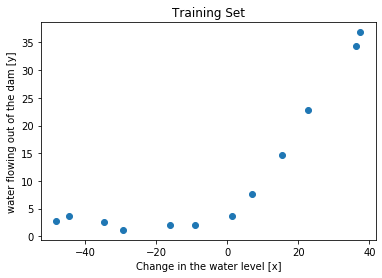

In [18]:
rawdata = sio.loadmat('data1ex5',mat_dtype=True)
TrSet = DataSet(rawdata['X'],rawdata['y'],'Training Set')
ValSet = DataSet(rawdata['Xtest'],rawdata['ytest'],'CrossVal Set')
TestSet = DataSet(rawdata['Xval'],rawdata['yval'],'Test Set')
TrSet.Plot()
# print(TrSet.X)
# print(TrSet.XPoly(3))

In [19]:
theta = np.ones(TrSet.n)
print('Theta_0:',theta)
lambd = 0
print('Cost Function',RegLinRegrCost(theta,TrSet.y,TrSet.Xbias,lambd))
print('Gradient:',LinRegrGradient(theta,TrSet.y,TrSet.Xbias,lambd))


Theta_0: [1. 1.]
Cost Function 303.9515255535976
Gradient: [-15.30301567 598.16741084]


In [20]:
ThetaStar = Train(theta,TrSet.y,TrSet.Xbias,lambd)
print('Trained Parameters: ', ThetaStar)

Trained Parameters:  [13.0879035   0.36777923]


## Learning Curve for Linear Regression

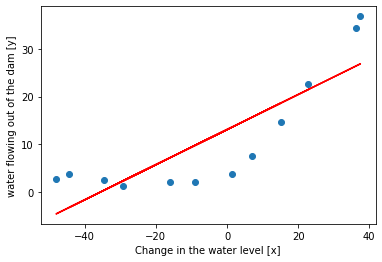

In [21]:
def Plot(th,Y,X):
    h = X @ th
    plt.scatter(X[:,1],Y)
    plt.plot(X[:,1],h,color='red')
    plt.ylabel('water flowing out of the dam [y]')
    plt.xlabel('Change in the water level [x]')
        
Plot(ThetaStar,TrSet.y,TrSet.Xbias)

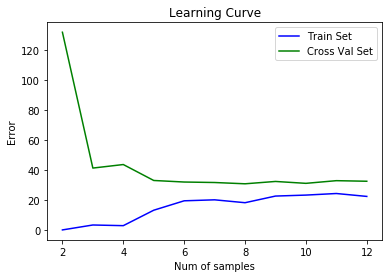

In [22]:
LearningCurve(TrSet, ValSet, TrSet.Xbias, ValSet.Xbias)

# Learning Curve for Polynomial Regression

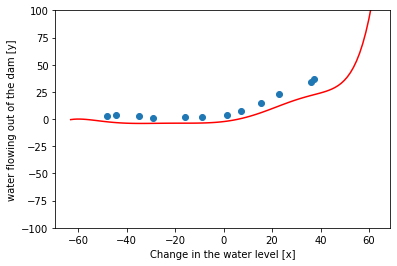

In [24]:
deg = 8
TrSet.XPolynomial(deg)

# Train Theta for the p regression
m,n = TrSet.XPoly.shape
theta = np.ones(n)
lambd = 0
ThetaSt = Train(theta,TrSet.y,TrSet.XPoly,lambd)
PlotPoly(ThetaSt,TrSet.y,TrSet.X,deg)

# Learning Curves with Polynomial Regression

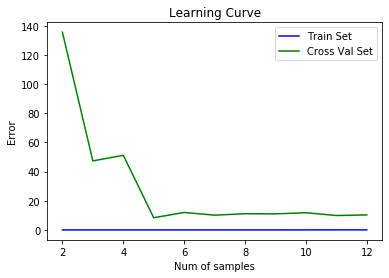

In [25]:
# Build the learning curve for the Polynomial Regression

deg = 8
TrSet.XPolynomial(deg)
ValSet.XPolynomial(deg)

LearningCurve(TrSet, ValSet, TrSet.XPoly, ValSet.XPoly)

# Playing with the regularization parameter $\lambda$

### $\lambda = 1 $

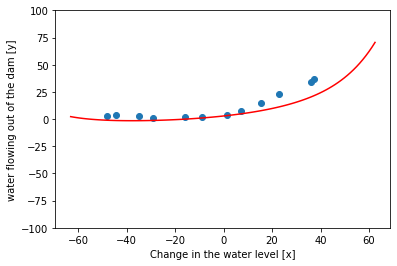

In [27]:
lambd = 1
deg = 8
TrSet.XPolynomial(deg)
# Train Theta for the p regression
m,n = TrSet.XPoly.shape
theta = np.ones(n)
ThetaSt = Train(theta,TrSet.y,TrSet.XPoly,lambd)
PlotPoly(ThetaSt,TrSet.y,TrSet.X,deg)


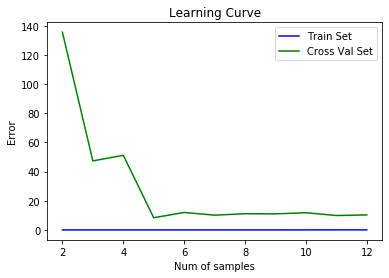

In [28]:
LearningCurve(TrSet, ValSet, TrSet.XPoly, ValSet.XPoly)

### $\lambda = 100$

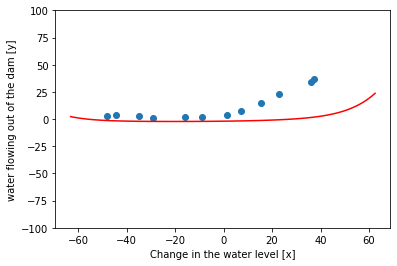

In [30]:
lambd = 100
deg = 8
TrSet.XPolynomial(deg)
# Train Theta for the p regression
m,n = TrSet.XPoly.shape
theta = np.ones(n)
ThetaSt = Train(theta,TrSet.y,TrSet.XPoly,lambd)
PlotPoly(ThetaSt,TrSet.y,TrSet.X,deg)

### Plotting error vs $\lambda$ for polynomial regression.

Text(0, 0.5, 'Error')

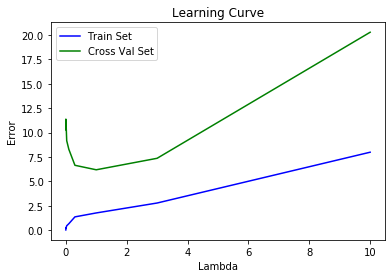

In [31]:
Lambdas = [0, 0.01, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
deg = 8

TrainError = np.zeros(len(Lambdas))
CrossValError = np.zeros(len(Lambdas))
theta = np.ones(TrSet.XPoly.shape[1])
TrSet.XPolynomial(deg)

for i,lamd in enumerate(Lambdas):
    ThetaTrain = Train(theta,TrSet.y,TrSet.XPoly,lamd)
    TrainError[i] = Error(ThetaTrain,TrSet.y,TrSet.XPoly)
    CrossValError[i] = Error(ThetaTrain,ValSet.y,ValSet.XPoly)
    
plt.plot(Lambdas,TrainError,color='blue')
plt.plot(Lambdas,CrossValError,color='green')
plt.legend(['Train Set','Cross Val Set'])
plt.title('Learning Curve')
plt.xlabel('Lambda')
plt.ylabel('Error')